# Using poliastro

poliastro version 0.12

This notebook is just following the guide at https://docs.poliastro.space/en/stable/user_guide.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from astropy import units as u

from poliastro.bodies import Earth
from poliastro.twobody import Orbit

import emcee
import corner
import timeit

In [2]:
# Data from Curtis, example 4.3 poliastro user guide
r = [-6045, -3490, 2500] * u.km
v = [-3.457, 6.618, 2.533] * u.km / u.s


ss = Orbit.from_vectors(Earth, r, v)

In [3]:
ss

7283 x 10293 km x 153.2 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

In [4]:
ss.epoch

<Time object: scale='tt' format='jyear_str' value=J2000.000>

In [5]:
ss.epoch.unix

946727935.8160001

In [6]:
ss.plot()

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(31, 119, 180)', 'dash':…

In [7]:
# Vector format.
# [vx, vy, vz]
ss.v

<Quantity [-3.457,  6.618,  2.533] km / s>

In [8]:
ss.nu

<Quantity 0.49647296 rad>

In [9]:
ss.epoch.unix

946727935.8160001

In [10]:
ss_5min = ss.propagate(5 * u.min)

In [11]:
ss_5min.epoch.unix

946728235.8160001

In [12]:
ss_5min.nu

<Quantity 0.80642668 rad>

In [13]:
ss.nu

<Quantity 0.49647296 rad>

In [14]:
#ss.plot()
ss_5min.plot()

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(31, 119, 180)', 'dash':…

In [15]:
ss.plot()

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(31, 119, 180)', 'dash':…

In [16]:
ss_30min = ss.propagate(30 *u.min)

In [17]:
ss_30min.plot()

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(31, 119, 180)', 'dash':…

In [18]:
from poliastro.plotting.static import StaticOrbitPlotter

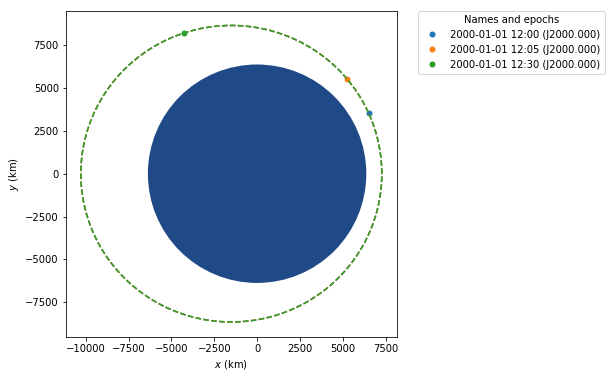

In [20]:
plotter = StaticOrbitPlotter()
plotter.plot(      ss, label=ss.epoch)
plotter.plot( ss_5min, label=ss_5min.epoch)
plotter.plot(ss_30min, label=ss_30min.epoch)


In [22]:
ss.classical()

(<Quantity 8788.08176728 km>,
 <Quantity 0.17121118>,
 <Quantity 153.24922852 deg>,
 <Quantity 255.27928533 deg>,
 <Quantity 20.06813997 deg>,
 <Quantity 28.44580498 deg>)

In [23]:
ss_30min.classical()

(<Quantity 8788.08176728 km>,
 <Quantity 0.17121118>,
 <Quantity 153.24922852 deg>,
 <Quantity 255.27928533 deg>,
 <Quantity 20.06813997 deg>,
 <Quantity 117.52284844 deg>)

In [24]:
ss.classical

<bound method Orbit.classical of 7283 x 10293 km x 153.2 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)>

| symbol | description |
|:--------:|------|
|   a | semi-major axis| 
| ecc | eccentricity|
| inc | inclination|
|raan | right ascension of the ascending node|
|argp | argument of the pericenter|
|  nu | true anomaly|